<a href="https://colab.research.google.com/github/srivatsan88/model-deployment/blob/master/Deploying_Image_Classification_Tensorflow_Model_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is supporting code for my video - https://youtu.be/8NU2RfJN33I


![Model Training](https://drive.google.com/uc?id=1ORAtpJyRa8Xb_UJQhsVWKZMeKGJa6QnZ)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/Colab Notebooks/models/image/models'

assets	saved_model.pb	variables


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/models/image/models')
print(model.outputs)

[<tf.Tensor 'dense/Identity:0' shape=(None, 3) dtype=float32>]


In [ ]:
print(model.inputs)

[<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>]


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 2,227,715
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
model.get_weights()

[array([[[[ 0.20834742],
          [ 0.5888533 ],
          [ 0.44482142],
          ...,
          [ 0.06637412],
          [-0.0758739 ],
          [ 0.82385516]],
 
         [[ 0.1772691 ],
          [-0.34688675],
          [ 0.7343333 ],
          ...,
          [ 0.09681732],
          [-0.44155464],
          [ 0.8772748 ]],
 
         [[ 0.17706484],
          [-0.41034952],
          [ 0.4326101 ],
          ...,
          [ 0.09240165],
          [-0.02720948],
          [ 0.79020375]]],
 
 
        [[[ 0.44978577],
          [ 1.0670848 ],
          [ 0.12934676],
          ...,
          [ 0.07859593],
          [-0.655095  ],
          [ 0.12022284]],
 
         [[ 0.67309344],
          [-0.55282366],
          [ 0.33117414],
          ...,
          [ 0.08741273],
          [-0.14351119],
          [ 0.20919554]],
 
         [[ 0.43616438],
          [-0.74709594],
          [ 0.17392375],
          ...,
          [ 0.02288428],
          [ 1.4510733 ],
          [ 0.089

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
def scale(image):
  image = tf.cast(image, tf.float32)
  image /= 255.0

  return tf.image.resize(image,[224,224])

In [ ]:
def decode_img(img):
  img = tf.io.read_file(img)
  img = tf.image.decode_jpeg(img, channels=3)
  img = scale(img)
  return np.expand_dims(img, axis=0)

In [ ]:
classes=['angular_leaf_spot','bean_rust','healthy']

In [ ]:
!wget -q http://barmac.com.au/wp-content/uploads/sites/3/2016/01/Angular-Leaf-Spot-Beans1.jpg

In [ ]:
!wget -q https://northamericanfarmer.com/naf-content/uploads/2017/04/green-bean.jpg

In [ ]:
!wget -q https://s3.eu-west-2.amazonaws.com/growinginteractive/diseases/bean-rust-2.jpg

In [ ]:
!ls

Angular-Leaf-Spot-Beans1.jpg  drive	      sample_data
bean-rust-2.jpg		      green-bean.jpg


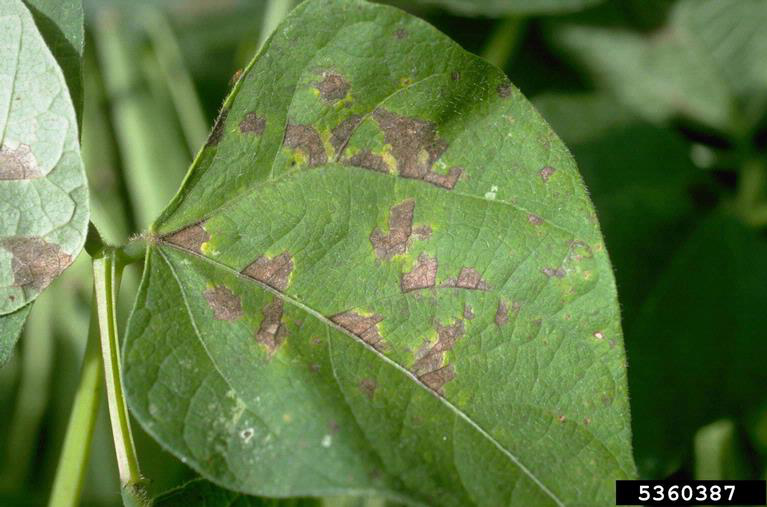

In [ ]:
Image.open('Angular-Leaf-Spot-Beans1.jpg')

In [ ]:
y_pred=np.argmax(model.predict(decode_img('Angular-Leaf-Spot-Beans1.jpg')),axis=1)

In [ ]:
classes[y_pred[0]]

'angular_leaf_spot'

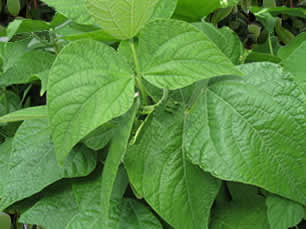

In [ ]:
Image.open('green-bean.jpg')

In [ ]:
y_pred=np.argmax(model.predict(decode_img('green-bean.jpg')),axis=1)
classes[y_pred[0]]

'healthy'

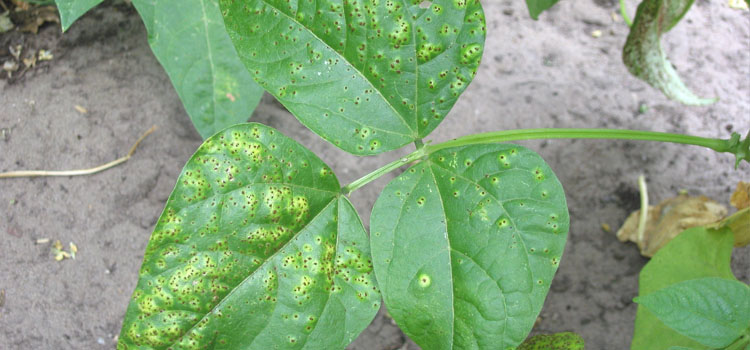

In [ ]:
Image.open('bean-rust-2.jpg')

In [ ]:
y_pred=np.argmax(model.predict(decode_img('bean-rust-2.jpg')),axis=1)
classes[y_pred[0]]

'bean_rust'